In [14]:
# parse and visualize the logfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot(log_file):
    # load the log file
    with open(log_file, "r") as f:
        lines = f.readlines()

    # parse the individual lines, group by stream (train,val,hella)
    streams = {}
    for line in lines:
        step, stream, val = line.strip().split()
        if stream not in streams:
            streams[stream] = {}
        streams[stream][int(step)] = float(val)

    # convert each stream from {step: val} to (steps[], vals[])
    # so it's easier for plotting
    streams_xy = {}
    for k, v in streams.items():
        # get all (step, val) items, sort them
        xy = sorted(list(v.items()))
        # unpack the list of tuples to tuple of lists
        streams_xy[k] = list(zip(*xy))

    # Panel 1: losses: both train and val
    xs, ys = streams_xy["train"] # training loss
    ys = np.array(ys)
    plt.plot(xs, ys, label=f'train accuracy')
    xs, ys = streams_xy["val"] # validation loss
    plt.plot(xs, ys, label=f'val accuracy')
    plt.xlabel("steps")
    plt.ylabel("Accuracy")
    plt.xscale("log")
    plt.xlim(left=10)
    plt.grid()

    plt.legend()
    plt.title("Accuracy")

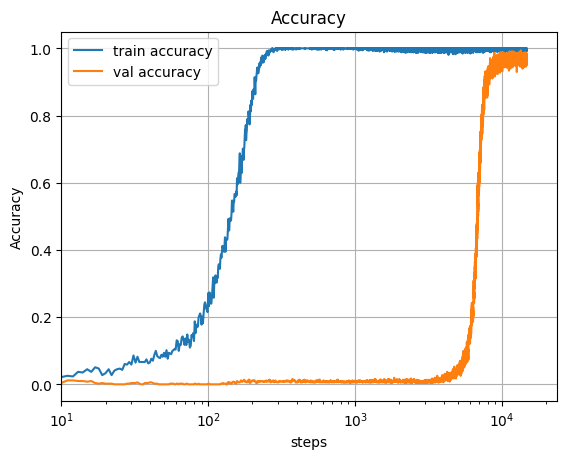

In [15]:
plot("log/log.txt")

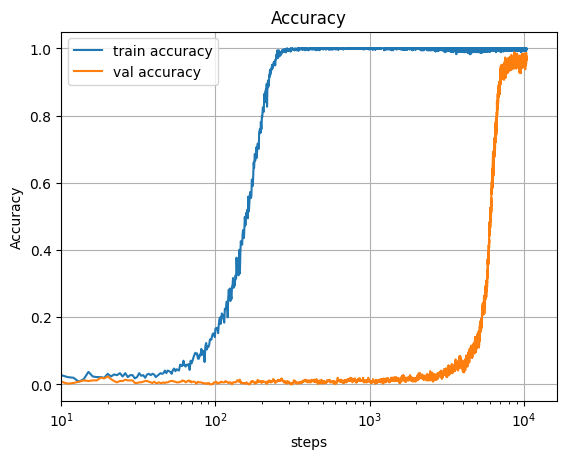

In [18]:
plot("log_grokfast/log.txt")